In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.5.5.62-cp36-abi3-win_amd64.whl (42.2 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\shraddha\\appdata\\local\\programs\\python\\python39\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



Text(0.5, 1.0, 'Grayscale Image')

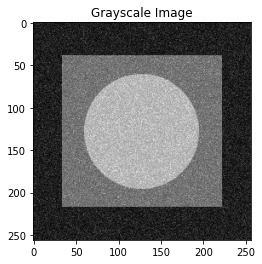

In [3]:
fig1 = cv2.imread("Fig1.tif")
fig1 = cv2.cvtColor(fig1, cv2.COLOR_BGR2GRAY)
plt.imshow(fig1, cmap = 'gray')
plt.title("Grayscale Image")

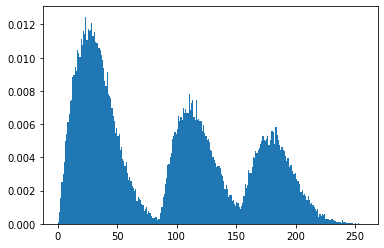

In [62]:
plt.hist(fig1.ravel(), 256,[0,256], density = True)
plt.show()

In [59]:
fig1.mean()

89.59249877929688

In [61]:
fig1.std()

63.856217673211454

## Q2

Text(0.5, 1.0, 'Grayscale Image')

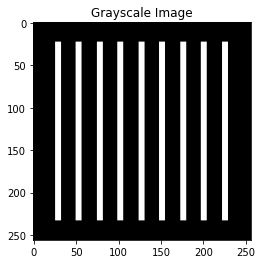

In [5]:
fig2 = cv2.imread("Fig2.tif")
fig2 = cv2.cvtColor(fig2, cv2.COLOR_BGR2GRAY)
plt.imshow(fig2, cmap = 'gray')
plt.title("Grayscale Image")

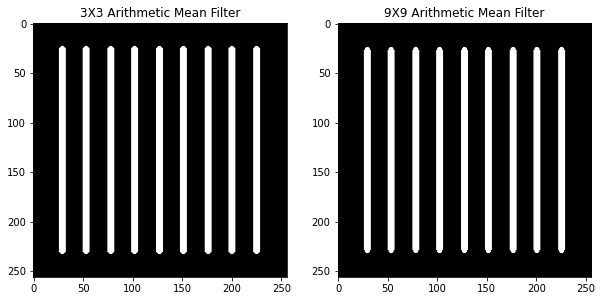

In [6]:
kernal1 = np.ones((5,5), np.float32)/25
kernal2 = np.ones((9,9), np.float32)/81

fig2 = (fig2*255).astype(np.uint8)
a = cv2.filter2D(fig2, -1, kernal1)
b = cv2.filter2D(fig2, -1, kernal2)

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(a, cmap = 'gray')
plt.title("3X3 Arithmetic Mean Filter")

plt.subplot(1,2,2)
plt.imshow(b, cmap = 'gray')
plt.title("9X9 Arithmetic Mean Filter")

plt.show()

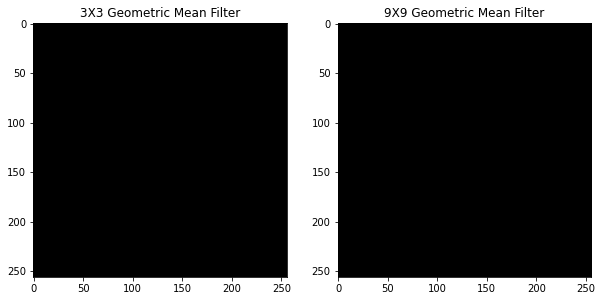

In [7]:
rows_a, cols_a = a.shape[:2]
ksize_a = 3

padsize = int((ksize_a-1)/2)
pad_img_a = cv2.copyMakeBorder(a, *[padsize]*4, cv2.BORDER_DEFAULT)
geomean_a = np.zeros_like(a)
for r in range(rows_a):
    for c in range(cols_a):
        geomean_a[r, c] = np.prod(pad_img_a[r:r+ksize_a, c:c+ksize_a])**(1/(ksize_a**2))
        
rows_b, cols_b = b.shape[:2]
ksize_b = 9

padsize = int((ksize_b-1)/2)
pad_img_b = cv2.copyMakeBorder(b, *[padsize]*4, cv2.BORDER_DEFAULT)
geomean_b = np.zeros_like(b)
for r in range(rows_b):
    for c in range(cols_b):
        geomean_a[r, c] = np.prod(pad_img_b[r:r+ksize_b, c:c+ksize_b])**(1/(ksize_b**2))
        
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(geomean_a, cmap = 'gray')
plt.title("3X3 Geometric Mean Filter")

plt.subplot(1,2,2)
plt.imshow(geomean_b, cmap = 'gray')
plt.title("9X9 Geometric Mean Filter")

plt.show()

C:\Users\SHRADDHA\AppData\Local\Temp/ipykernel_11076/1918014359.py:4: RuntimeWarning: divide by zero encountered in true_divide
  harmonicmean_a[r, c] = 1/np.sum(1/pad_img_a[r:r+ksize_a, c:c+ksize_a])
C:\Users\SHRADDHA\AppData\Local\Temp/ipykernel_11076/1918014359.py:10: RuntimeWarning: divide by zero encountered in true_divide
  harmonicmean_b[r, c] = 1/np.sum(1/pad_img_b[r:r+ksize_b, c:c+ksize_b])


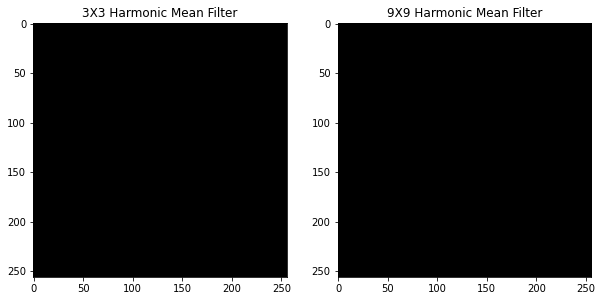

In [8]:
harmonicmean_a = np.zeros_like(a)
for r in range(rows_a):
    for c in range(cols_a):
        harmonicmean_a[r, c] = 1/np.sum(1/pad_img_a[r:r+ksize_a, c:c+ksize_a])
harmonicmean_a = harmonicmean_a*ksize_a**2

harmonicmean_b = np.zeros_like(b)
for r in range(rows_b):
    for c in range(cols_b):
        harmonicmean_b[r, c] = 1/np.sum(1/pad_img_b[r:r+ksize_b, c:c+ksize_b])
harmonicmean_b = harmonicmean_b*ksize_b**2

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(harmonicmean_a, cmap = 'gray')
plt.title("3X3 Harmonic Mean Filter")

plt.subplot(1,2,2)
plt.imshow(harmonicmean_b, cmap = 'gray')
plt.title("9X9 Harmonic Mean Filter")

plt.show()

## Q3

Text(0.5, 1.0, 'Grayscale Image')

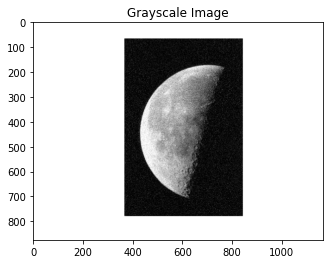

In [9]:
fig3 = cv2.imread("Fig3noisymoon.png")
fig3 = cv2.cvtColor(fig3, cv2.COLOR_BGR2GRAY)
plt.imshow(fig3, cmap = 'gray')
plt.title("Grayscale Image")

c:\users\shraddha\appdata\local\programs\python\python39\lib\site-packages\scipy\signal\signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
c:\users\shraddha\appdata\local\programs\python\python39\lib\site-packages\scipy\signal\signaltools.py:1611: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


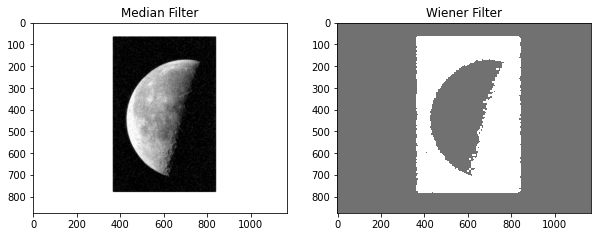

In [10]:
median = cv2.medianBlur(fig3, 5)         #size of kernal = 5

from scipy.signal import wiener
wiener = wiener(fig3, (2,2))

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(median, cmap = 'gray')
plt.title("Median Filter")

plt.subplot(1,2,2)
plt.imshow(wiener, cmap = 'gray')
plt.title("Wiener Filter")

plt.show()

## Q4

Text(0.5, 1.0, 'Grayscale Image')

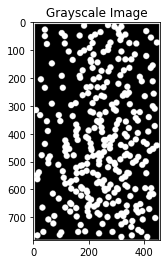

In [78]:
fig4 = cv2.imread("Fig7.tif")
fig4 = cv2.cvtColor(fig4, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(fig4, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = 'gray')
plt.title("Grayscale Image")

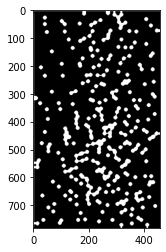

In [82]:
kernel = np.ones((3,3), np.uint8)
img_erosion = cv2.erode(thresh1, kernel, iterations=4)
opening_img = cv2.dilate(img_erosion,kernel,iterations = 1)
plt.imshow(opening_img, cmap = 'gray')

## Q5

Text(0.5, 1.0, 'Grayscale Image')

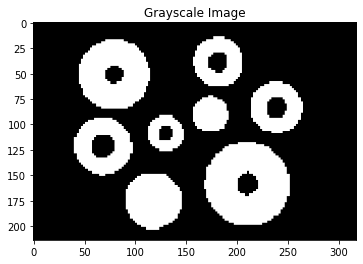

In [46]:
fig5 = cv2.imread("Fig5.png")
fig5 = cv2.cvtColor(fig5, cv2.COLOR_BGR2GRAY)
plt.imshow(fig5, cmap = 'gray')
plt.title("Grayscale Image")

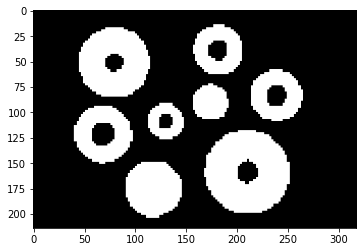

In [47]:
ret, thresh1 = cv2.threshold(fig5, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = 'gray')

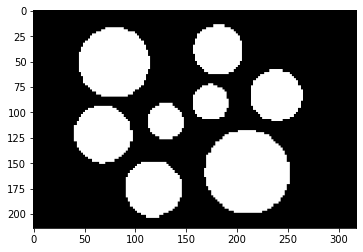

In [48]:
from scipy import ndimage
hole = ndimage.binary_fill_holes(thresh1).astype(int)
plt.imshow(hole, cmap = 'gray')

In [58]:
connectivity = 8
num_labels, labelmap = cv2.connectedComponents(hole, connectivity, cv2.CV_32S)
img1 = np.hstack((img, labelmap.astype(np.float32)/(num_labels - 1)))


print(num_labels)
# plt.imshow(img)

plt.imshow(labelmap)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5632: error: (-215:Assertion failed) iDepth == CV_8U || iDepth == CV_8S in function 'cv::connectedComponents_sub1'


In [54]:
ret, img = cv2.threshold(fig5, 120, 255, cv2.THRESH_BINARY)
connectivity = 8
num_labels, labelmap = cv2.connectedComponents(img, connectivity, cv2.CV_32S)
img1 = np.hstack((img, labelmap.astype(np.float32)/(num_labels - 1)))

error: Unknown C++ exception from OpenCV code

In [41]:
def connected_component_label(img):
    
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

In [42]:
connected_component_label(hole)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5632: error: (-215:Assertion failed) iDepth == CV_8U || iDepth == CV_8S in function 'cv::connectedComponents_sub1'


In [56]:
connectivity = 8
num_labels, labelmap = cv2.connectedComponentsWithStats(thresh1, connectivity, cv2.CV_32S)
img1 = np.hstack((img, labelmap.astype(np.float32)/(num_labels - 1)))

ValueError: too many values to unpack (expected 2)

In [57]:
img = cv2.imread('Fig5.png', cv2.IMREAD_GRAYSCALE)
otsu_thr, otsu_mask = cv2.threshold(hole, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

output = cv2.connectedComponentsWithStats(otsu_mask, connectivity, cv2.CV_32S)

num_labels, labelmap, stats, centers = output

colored = np.full((img.shape[0], img.shape[1], 3), 0, np.uint8)

for l in range(1, num_labels):
    if stats[l][4] > 200:
        colored[labelmap == l] = (0, 255*l/num_labels, 255*num_labels/l)
        cv2.circle(colored, 
                   (int(centers[l][0]), int(centers[l][1])), 5, (255, 0, 0), cv2.FILLED)
        
img = cv2.cvtColor(otsu_mask*255, cv2.COLOR_GRAY2BGR)
plt.title("connected component")
plt.imshow(np.hstack((img, colored)))
print(num_labels)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 4 (CV_32SC1)


## Q6

Text(0.5, 1.0, 'Grayscale Image')

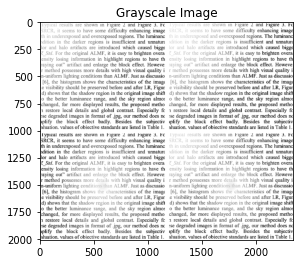

In [13]:
fig6 = cv2.imread("Fig6non-uniformillumination.png")
fig6 = cv2.cvtColor(fig6, cv2.COLOR_BGR2GRAY)
plt.imshow(fig6, cmap = 'gray')
plt.title("Grayscale Image")

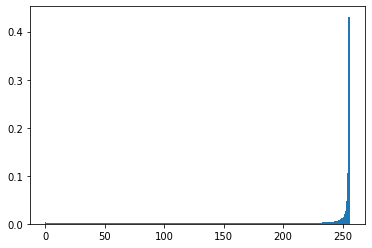

In [83]:
plt.hist(fig6.ravel(), 256,[0,256], density = True)
plt.show()

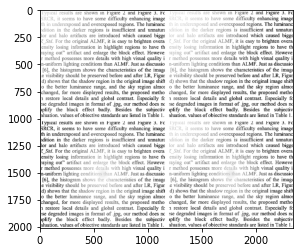

In [14]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharp = cv2.filter2D(fig6, -1, kernel)
plt.imshow(sharp, cmap = 'gray')

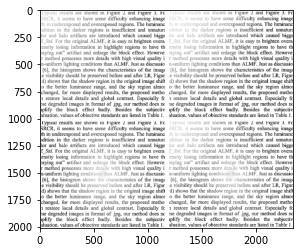

In [15]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

harpened_image = unsharp_mask(sharp)
plt.imshow(harpened_image, cmap = 'gray')